In [14]:
import pandas as pd
from matplotlib import pyplot as plt

1.1Choose dataset - Обрати датасет - Heart Attack Analysis & Prediction Dataset https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [2]:
url = "https://raw.githubusercontent.com/DatenFluss/machine-learning-university-course/main/res/heart.csv"
df = pd.read_csv(url)

1.2 - Output the dataset

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [18]:
df.shape

(303, 14)

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [20]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


2.1 - find out if there are missing data (NaN or null)

In [4]:
null_data = df.isnull().sum()
nan_data = df.isna().sum()

In [5]:
null_data

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [6]:
nan_data

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


2.2 replace missing data, for example with 0.0
As we can see, there is no null or nan data, but for the sake of the task, we'll change supposed nan values to 0.0

In [7]:
df_filled = df.fillna(0.0)

3 demonstrate the removal of all objects from NaN. As previously stated, there are no nan values in the dataset, but for the sake of this task, we will perform this task

In [8]:
df_no_nan = df.dropna()

4 perform summation of several columns to add a summary column.

In [9]:
df_no_nan['summary'] = df_no_nan[['trtbps', 'chol', 'thalachh']].sum(axis=1)

In [10]:
df_no_nan['summary']

,summary
0,528
1,567
2,506
3,534
4,637
...,...
298,504
299,506
300,478
301,376


5 based on the selected data, make intermediate conclusions in several categories.

In [11]:
age_bins = [29, 40, 50, 60, 70, 80]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df_no_nan['age_group'] = pd.cut(df_no_nan['age'], bins=age_bins, labels=age_labels)

grouped_data = df_no_nan.groupby(['age_group', 'output']).size().reset_index(name='counts')

grouped_data.head()

<ipython-input-11-92dd25222119>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_no_nan.groupby(['age_group', 'output']).size().reset_index(name='counts')


,age_group,output,counts
0,30-39,0,6
1,30-39,1,12
2,40-49,0,23
3,40-49,1,53
4,50-59,0,65


Extra task: add visual representation of heart desease by age groups

<ipython-input-15-617967cc31b1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df_no_nan.groupby(['age_group', 'output']).size().unstack()


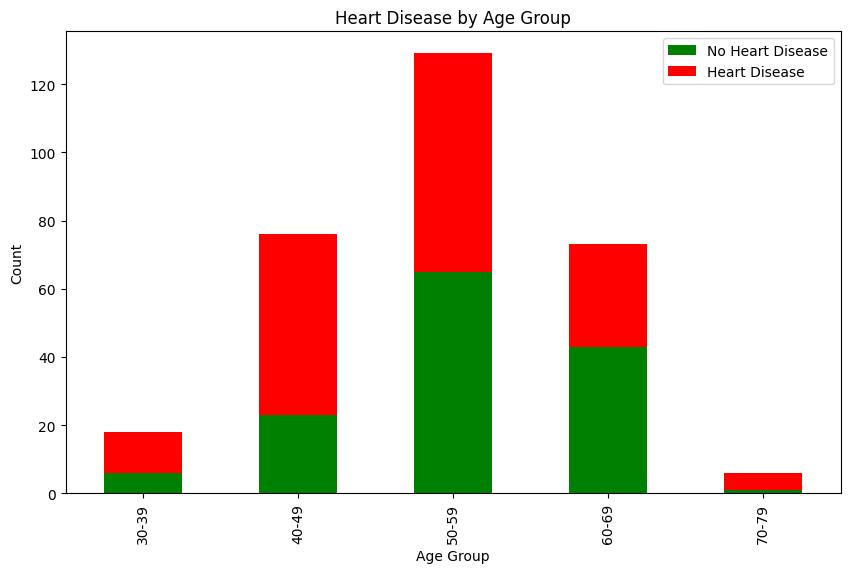

In [15]:
age_group_counts = df_no_nan.groupby(['age_group', 'output']).size().unstack()

age_group_counts.plot(kind='bar', stacked=True, figsize=(10,6), color=['green', 'red'])
plt.title('Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'], loc='upper right')
plt.show()